## Decision Trees (Arboles de Decisión)

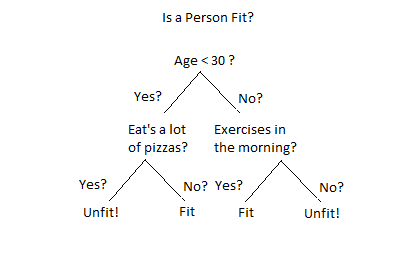

Los Arboles de Decisión (o Decision Trees) es un algoritmos de regresión y clasificación basado en condicionales.

Se construyen utilizando dos tipos de elementos: **nodos y ramas**. En cada nodo, se evalúa una de las características (atributo) de nuestros datos para dividir las observaciones en el proceso de entrenamiento o para hacer que un punto de datos específico siga un camino determinado al hacer una predicción.

Cuando se están generando, los árboles de decisión se construyen evaluando recursivamente diferentes características (atributos) y utilizando en cada nodo la característica que mejor divide los datos.

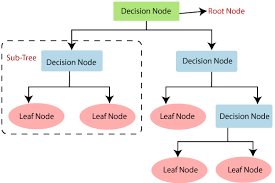

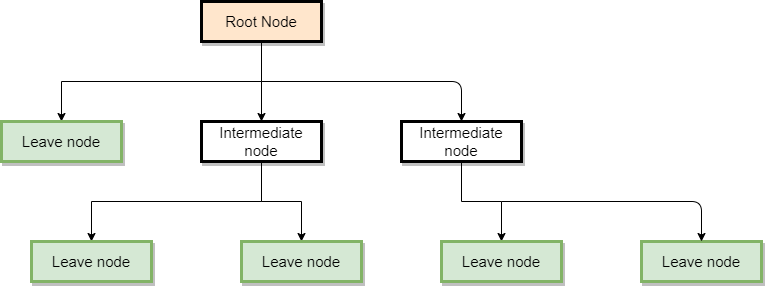


___

- **El nodo raíz (root node)**: Es el nodo que inicia el grafo. En un árbol de decisión normal evalúa la variable que mejor divide los datos.



- **Los nodos intermedios (nodes)**: Son nodos donde se evalúan variables pero que no son los nodos finales donde se realizan las predicciones.



- **Los nodos hoja (leaf node)**: Son los nodos finales del árbol, donde se realizan las predicciones de una categoría o un valor numérico.


Los árboles de decisión se construyen dividiendo recursivamente las muestras del conjunto de entrenamiento utilizando una función de error. Esto se hace evaluando ciertas métricas, como el **índice de Gini** o la **Entropía** para árboles de decisión categóricos, o el **error cuadrático medio** o **error Residual** para árboles de regresión.

_**Documentación:** https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html_

In [1]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn # Para ver la versión

from sklearn import datasets

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

numpy==1.20.3
pandas==1.2.4
matplotlib==3.4.2
seaborn==0.11.1
scikit-learn==1.5.1


In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Train, Test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (105, 4), y_train: (105,)
X_test: (45, 4),  y_test: (45,)


### Modelo

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Predicciones

In [34]:
yhat = model.predict(X_test)

yhat

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [35]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.9505494505494506
Accuracy: 0.9777777777777777
Precisión: 0.9761904761904763
Sensibilidad: 0.9743589743589745
F1-score: 0.974320987654321


### Confusion Matrix

In [36]:
confusion_matrix(y_test, yhat, labels = [0, 1, 2])

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]])

### Classification Report

In [37]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     0.923     0.960        13
           2      0.929     1.000     0.963        13

    accuracy                          0.978        45
   macro avg      0.976     0.974     0.974        45
weighted avg      0.979     0.978     0.978        45



### Atributos y Métodos

In [38]:
# .predict_proba()

model.predict_proba(X_test)

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.

In [39]:
# .feature_importances_ es un atributo que retorna un array con las importancias de cada columna
# En este caso como entrenamos con 4 columnas tenemos un array de 4 elementos.

model.feature_importances_

array([0.        , 0.        , 0.95750668, 0.04249332])

In [40]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [41]:
# Bucle "columna" vs "importancia"

for col, imp in zip(iris.feature_names, model.feature_importances_):
    print(f"Columna: {col} Importancia: {imp}")

Columna: sepal length (cm) Importancia: 0.0
Columna: sepal width (cm) Importancia: 0.0
Columna: petal length (cm) Importancia: 0.9575066820316898
Columna: petal width (cm) Importancia: 0.04249331796831021


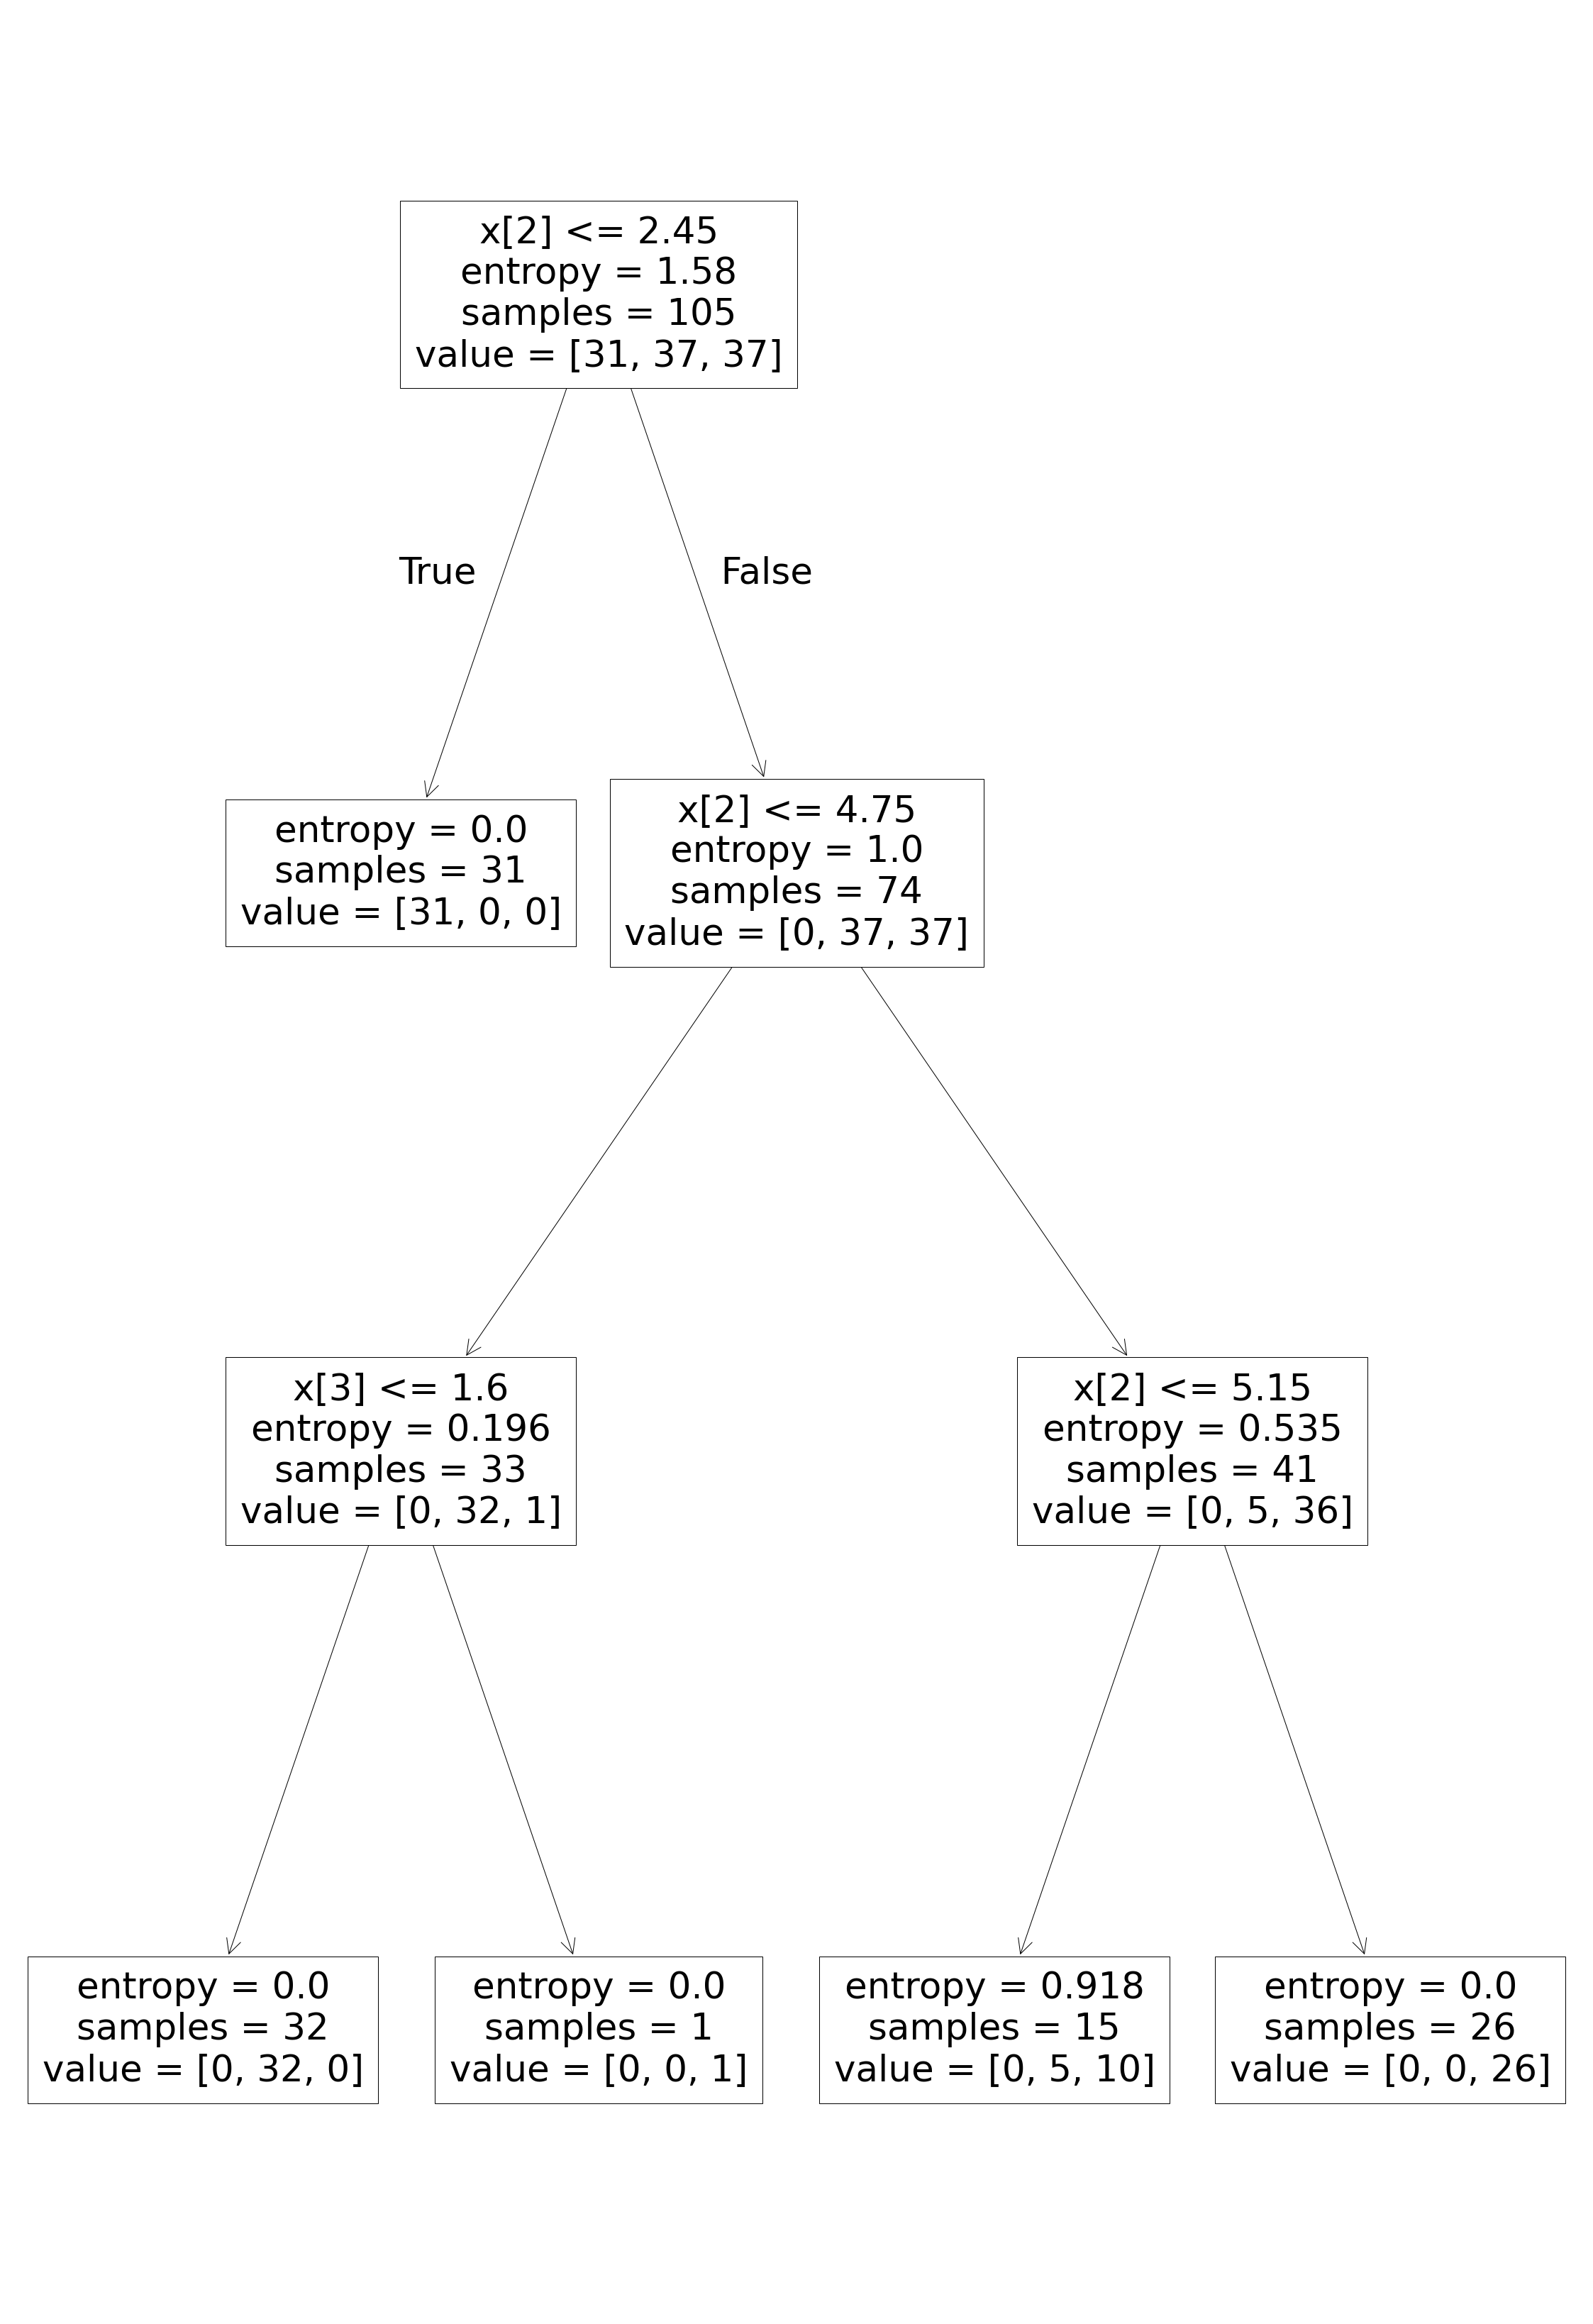

In [42]:
# La función plot_tree() genera un grafico del modelo
# Toma como parámetro el modelo ya entrenado

from sklearn.tree import plot_tree

plt.figure(figsize = (40, 60))

plot_tree(model) 

#plt.savefig("iris_decision_tree.jpg")

plt.show()

In [43]:
# Parametros del Modelo, definidos por defecto

print(f"criterion: {model.criterion}")
print(f"splitter: {model.splitter}")
print(f"max_depth: {model.max_depth}")
print(f"min_samples_split: {model.min_samples_split}")
print(f"min_samples_leaf: {model.min_samples_leaf}")
print(f"min_weight_fraction_leaf: {model.min_weight_fraction_leaf}")
print(f"max_features: {model.max_features}")
print(f"random_state: {model.random_state}")
print(f"max_leaf_nodes: {model.max_leaf_nodes}")
print(f"min_impurity_decrease: {model.min_impurity_decrease}")
print(f"class_weight: {model.class_weight}")
print(f"ccp_alpha: {model.ccp_alpha}")

criterion: entropy
splitter: best
max_depth: 3
min_samples_split: 2
min_samples_leaf: 1
min_weight_fraction_leaf: 0.0
max_features: None
random_state: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
class_weight: None
ccp_alpha: 0.0


In [44]:
# .get_params() retorna un diccionario con los parametros del modelo

model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
print(f"Profundidad: {model.get_depth()}")
print(f"Numero de nodos hoja: {model.get_n_leaves()}")

### Parámetros del Modelo (Tuning)

Dependiendo del modelo podemos "ajustarlo" iterando sobre los posibles valores de sus parámetros.

A este procedimiento se le conoce como **"Tuning"**.

Cada modelo de regresión y clasificación tiene parámetros ajustables.

#### Parametros de DecisionTreeClassifier()

- **`criterion`**: {"gini", "entropy"}, **default** = "gini"
    - Es la función para medir la calidad de una división/split. Los criterios admitidos son "gini" para la impureza de Gini y "entropía" para la ganancia de información.
    

$$ Gini = 1 - \sum_{K}^{k = 1}(p_{k})^2 $$

$$ Entropy = - \sum_{k=1}^{K}p_{k}log_{2}(p_{k})$$

___

- **`splitter`**: {"best", "random"}, **default** = "best"
    - Es la estrategia que usa el modelo para la división de cada nodo.
    
___

- **`max_depth`**: int, **default** = None
    - La profundidad máxima del árbol. Si es **None** los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de **`min_samples_split`** elementos.
        
___

- **`min_samples_split`**: int or float, **default** = 2
    - El número mínimo de muestras requeridas para dividir un nodo interno.
    - Si es int, considera **`min_samples_split`** como el número mínimo.
    - Si es float, entonces **`min_samples_split`** es una fracción y **`ceil(min_samples_split * n_samples)`** es el número mínimo de muestras para cada división/split.
        
___

- **`min_samples_leaf`**: int or float, **`default`** = 1
    - El número mínimo de muestras requeridas para llegar a nodo hoja. Es un punto de división a cualquier profundidad del arbol  solo se considerará si deja al menos **`min_samples_leaf`** muestras de entrenamiento en cada una de las ramas izquierda y derecha.
    - Si es int, considera **`min_samples_leaf`** como el número mínimo.
    - Si es float, entonces **`min_samples_split`** es una fracción y **`ceil(min_samples_leaf * n_samples)`** es el número mínimo de muestras para cada nodo.
        
___

- **`min_weight_fraction_leaf`**: float, **`default`** = 0.0
    - La fracción ponderada mínima de la suma total de pesos (de todas las muestras de entrada) requerida para estar en un nodo hoja. Las muestras tienen el mismo peso cuando no se proporciona **`sample_weight`**.
    
___

- **`max_features`**: int, float or {"auto", "sqrt", "log2"}, **`default`** = None

    - El número de características (atributos) a considerar al buscar la mejor división:
    - Si es int, considera las funciones **`max_features`** en cada división.
    - Si es float, **`max_features`** es una fracción y se consideran **`int(max_features * n_features)`** características (atributos) en cada división.
    - Si es "auto", entonces **`max_features = sqrt(n_features)`**.
    - Si es "sqrt", entonces **`max_features = sqrt(n_features)`**.
    - Si es "log2", entonces **`max_features = log2(n_features)`**.
    - Si None, entonces **`max_features = n_features`**.
  
___

- **`random_state`**: int, **`default`** = None
    - Controla la aleatoriedad del estimador. Las características (atributos) siempre se permutan aleatoriamente en cada división, incluso si el divisor está configurado como "best".
    - Cuando **`max_features < n_features`**, el algoritmo seleccionará **`max_features`** al azar en cada división antes de encontrar la mejor división entre ellas. Pero la división mejor encontrada puede variar entre diferentes ejecuciones, incluso si **`max_features = n_features`**.
    - Ese es el caso, si la mejora del criterio es idéntica para varias divisiones y una división debe seleccionarse al azar.
    - Para obtener un comportamiento determinista durante el ajuste, **`random_state`** debe fijarse en un número entero.
  
___

- **`max_leaf_nodes`**: int, **`default`** = None
    - Este parámetro hace "crecer" el árbol ya que aumenta el número de nodos hoja.
    - Se define como "mejor nodo" como una reducción relativa de la impureza.
    - Si es None, entonces el modelo tendrá un número ilimitado de nodos hoja.
      
___

- **`min_impurity_decrease`**: float, **`default`** = 0.0
    - Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.
         
___

- **`class_weight`**: dict, list of dict or "balanced", **`default`** = None
    - Pesos asociados a cada clases en la forma **`{class_label : weight}`**.
    - Si es None, se supone que todas las clases tienen peso uno.
    - Para problemas de clasificación múltiple, se puede proporcionar una lista de diccionarios en el mismo orden que la columna y.
             
___

- **`ccp_alpha`**: non-negative float, **`default`** = 0.0
    - Parámetro de complejidad utilizado para **Minimal Cost-Complexity Pruning**.
    - Se elegirá el subárbol con la mayor complejidad de costos que sea menor que **`ccp_alpha`**. De forma predeterminada, no se realiza ninguna poda.

In [45]:
# Dataset del titanic preprocesado en clase

titanic = pd.read_csv("../Data/titanic_preprocesamiento.csv")

X = titanic.drop("Survived", axis = 1)
y = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (613, 11), y_train: (613,)
X_test: (263, 11),  y_test: (263,)


In [46]:
# Prueba con DecisionTreeClassifier() con parámetros por defecto

model = DecisionTreeClassifier()

# Entrenamiento
model.fit(X_train, y_train)

# Predicciones
yhat = model.predict(X_test)

# Métricas
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
print("ROC AUC:"      , roc_auc_score(y_test, yhat))

Jaccard Index: 0.6212519936204146
Accuracy: 0.7756653992395437
Precisión: 0.7601870606457762
Sensibilidad: 0.7724239021956087
F1-score: 0.76419724944913
ROC AUC: 0.7724239021956087


In [ ]:
print(f"Profundidad: {model.get_depth()}")
print(f"Numero de nodos hoja: {model.get_n_leaves()}")

In [88]:
# Prueba con DecisionTreeClassifier() usando diferentes parámetros
results = []
for max_depth in range(3, 10):
    for criterion in ['entropy', 'gini']:
        model = DecisionTreeClassifier(criterion         = criterion,
                                       max_depth         = max_depth)
    
        # Entrenamiento
        model.fit(X_train, y_train)
        
        # Predicciones
        yhat = model.predict(X_test)
        
        acc = accuracy_score(y_test, yhat)
        results.append([acc, model.get_params()])

In [62]:
results

[0.6996197718631179, 0.8098859315589354, 0.8136882129277566]

In [ ]:
print(f"Profundidad: {model.get_depth()}")
print(f"Numero de nodos hoja: {model.get_n_leaves()}")

In [ ]:
# La función plot_tree() genera un grafico del modelo
# Toma como parámetro el modelo ya entrenado

from sklearn.tree import plot_tree

plt.figure(figsize = (100, 200))

plot_tree(model) 

plt.savefig("iris_decision_tree.jpg")

plt.show()

**Ventajas:**

- La principal ventaja de los árboles de decisión es lo fáciles que son de interpretar. Mientras que otros modelos de aprendizaje automático están cerca de ser "black boxes", los árboles de decisión proporcionan una forma gráfica e intuitiva de comprender lo que hace el algoritmo.
- En comparación con otros algoritmos de aprendizaje automático, los árboles de decisión requieren menos datos para entrenar.
- Se pueden utilizar para clasificación y regresión.
- Son "simples".

**Desventajas:**

- Son bastante propensos a sobreajustarse (overfitting) a los datos de entrenamiento y pueden ser sensibles a los valores atípicos.
- Son aprendices débiles: un solo árbol de decisión normalmente no hace grandes predicciones, por lo que a menudo se combinan múltiples árboles para hacer "bosques" para dar lugar a modelos de conjunto más fuertes.

In [ ]:
################################################################################################################################

### Ejercicio 1:
- Utilizando bucles anidados, itera sobre los parámetros del modelo **`DecisionTreeClassifier()`**, guarda en una lista el indice de la iteración, la métrica que quieras comparar y los parametros del modelo de forma tal:
```python
[indice, metrica, model.get_params]
```
- Donde **`indice`** es el indice del modelo, **`metrica`** es la métrica con la que vas a comparar y **`model`** un modelo de DecisionTreeClassifier() con los parámetros modificados.
- Utiliza el dataset del titanic.
- ¿Cuales son los mejores parámetros?
- ¿Cuantas iteraciones se hicieron?
- ¿Cual fue la mejor iteración?

In [ ]:
# Dataset del titanic preprocesado en clase

titanic = pd.read_csv("../Data/titanic_preprocesamiento.csv")

X = titanic.drop("Survived", axis = 1)
y = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

In [ ]:
%%time

resultados = list()

i = 0

for criterion in ["gini", "entropy"]:
    for splitter in ["best", "random"]:
        for max_depth in range(20, 29):
            for min_samples_split in range(2, 11):
                for max_features in ["sqrt", "log2", None] + list(range(5, 10)):
    
                    model = DecisionTreeClassifier(criterion         = criterion,
                                                   splitter          = splitter,
                                                   max_depth         = max_depth,
                                                   min_samples_split = min_samples_split,
                                                   max_features      = max_features)
                    model.fit(X_train, y_train)

                    # Predicción
                    yhat = model.predict(X_test)

                    # Metrica
                    roc_auc = roc_auc_score(y_test, yhat)

                    resultados.append([i, roc_auc, model.get_params()])

                    i += 1

In [ ]:
df_params = pd.DataFrame(resultados, columns = ["indice", "roc_auc", "params"])

df_params.sort_values("roc_auc", ascending = False)

In [ ]:
df_params.sort_values("roc_auc", ascending = False).values[0, 2]